In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [46]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

In [58]:
def local_plot_zone(df, trend=False, order=1, y='RT'):
    fig = plt.figure(figsize=(8.5, 4))
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    if y == 'RT':
        plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    else:
        plt.ylabel('Intensity', fontname="Arial", fontsize=15, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    if trend:
        sns.regplot(df.Mass, df[y], order=order)
    else:
        plt.scatter(df.Mass, df[y])
    
    return plt, fig

def local_plot_zones(df3p, df5p, trend=False, y='RT'):
    fig = plt.figure(figsize=(8.5, 4))
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    if trend:
        sns.regplot(df3p.Mass, df3p[y])
        sns.regplot(df5p.Mass, df5p[y], order=2)
    else:
        plt.scatter(df3p.Mass, df3p[y])
        plt.scatter(df5p.Mass, df5p[y])
    
    return plt, fig

In [124]:
def output(df_ds, plt, fig, idx, svg_name):
    fig.tight_layout()
    plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/GraphsOutput/Fig{idx}_{svg_name}.svg', dpi=300, transparent=True)
    df_ds.to_excel(f'/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/GraphsOutput/S{idx}_{svg_name}.xlsx')

In [37]:
df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724.xlsx')
# df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df_phe = thermo_df(df_phe)
plotly_zone(df_phe)
df_phe.shape

(5933, 3)

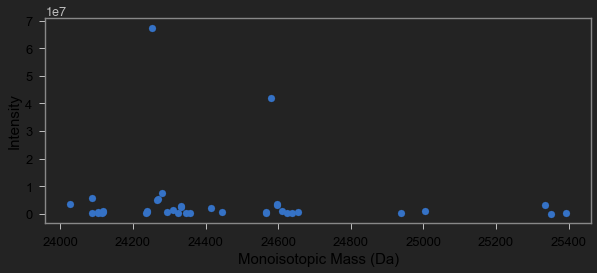

In [125]:
df_phe_25k = df_phe[(df_phe.Mass > 24000) & (df_phe.Mass < 26000) & (df_phe.Vol > 1E5)]
plt, fig = local_plot_zone(df_phe_25k, y='Vol')
# Fig 1
# fig.tight_layout()
# plt.savefig('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/GraphsOutput/Fig1_intact_mass.svg', dpi=300, transparent=True)
# df_phe_25k.to_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/GraphsOutput/intact_mass.xlsx')
output(df_phe_25k, plt, fig, 1, 'intact_mass')

In [39]:
plotly_zone(df_phe_25k, y='Vol')

In [36]:
df_5p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/GraphsOutput/phe5p.xlsx')
df_3p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/MassSum/GraphsOutput/phe3p.xlsx')
df_5p.shape, df_3p.shape

((3660, 4), (2192, 4))

In [42]:
df_5p = df_5p[df_5p.Vol > 1E5]
df_3p = df_3p[df_3p.Vol > 1E5]
df_5p.shape, df_3p.shape

((1592, 4), (1000, 4))

full_mass 24252.31 sum_value 24270.3


(110, 4)

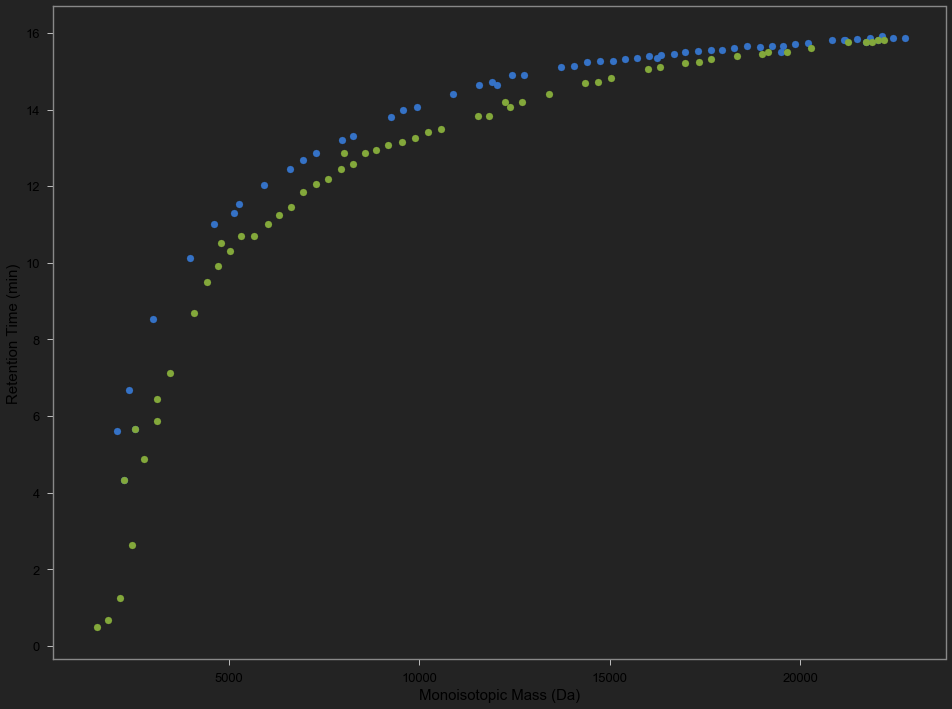

In [43]:
full_mass = 24252.31
df_3p_24252, df_5p_24252 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plot_zones(df_5p_24252, df_3p_24252)
df_24252 = pd.concat([df_3p_24252, df_5p_24252]).drop_duplicates()
df_24252.shape

full_mass 24581.374101 sum_value 24599.4


(115, 4)

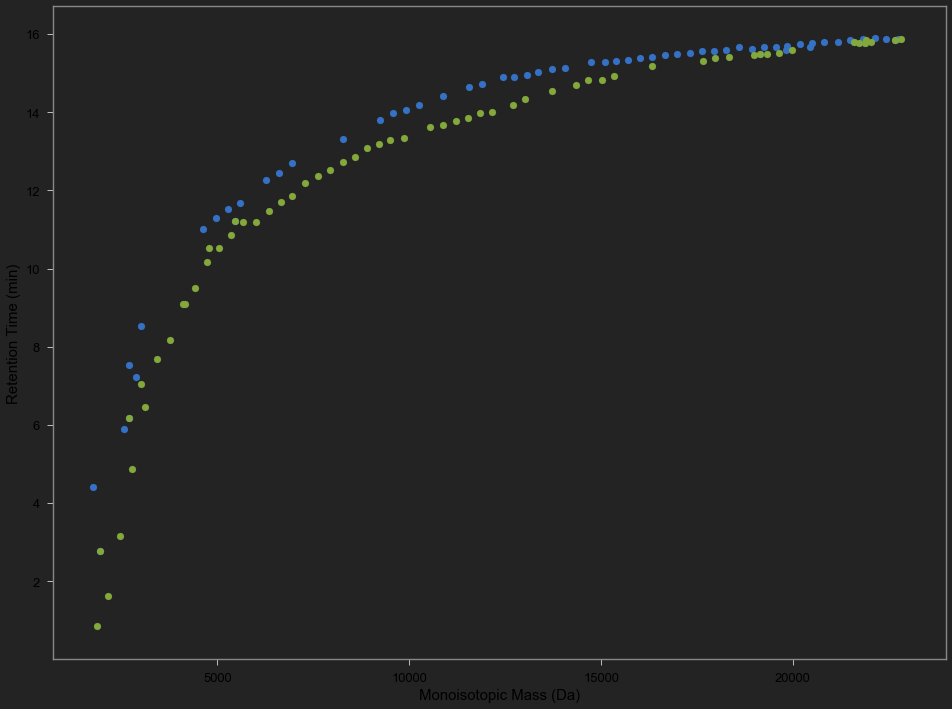

In [44]:
full_mass = 24581.374101
df_3p_24581, df_5p_24581 = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)
plot_zones(df_5p_24581, df_3p_24581)
df_24581 = pd.concat([df_3p_24581, df_5p_24581]).drop_duplicates()
df_24581.shape

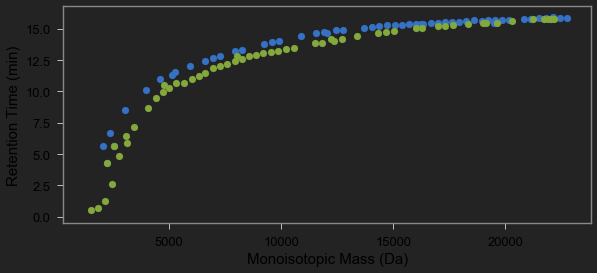

In [126]:
plt, fig = local_plot_zones(df_5p_24252, df_3p_24252)
# local_plot_zones(df_5p_24581, df_3p_24581)
# Fig 2 MassSum
df_a = df_5p_24252.copy()
df_b = df_3p_24252.copy()
df_a['is5p'] = True
df_b['is5p'] = False
df_merge = pd.concat([df_a, df_b])
output(df_merge, plt, fig, 2, 'mass_sum')

In [127]:
df_comm_5p = match_dfs(df_5p_24252, df_5p_24581)
plotly_zone(df_comm_5p)

In [85]:
full_mass = 24252.32
df_skeleton = df_5p_24252 #df_5p_24252 #df_5p_24597
group = 'Group_24581'

fullmass_dot = df_phe[(df_phe.Mass>full_mass-0.1) & (df_phe.Mass<full_mass+0.1)]
df_gap_dots = find_gap_dots(df_5p, df_skeleton, fullmass_dot)
df_gap_dots.shape

Processing forward 2073.23884927865
components 2073.23884927865-97.9769
keep this dot 2073.23884927865
397.9769 1773.23884927865 0.7549654569700087 4.8697194535340165
Processing the gap 97.9769-2073.23884927865, 94 dots


KeyboardInterrupt: 

In [52]:
plotly_zones(df_skeleton, df_gap_dots)

In [89]:
full_mass = 24581.3741
df_skeleton_24581 = df_5p_24581 #df_5p_24252 #df_5p_24597
group = 'Group_24581'

fullmass_dot_24581 = df_phe[(df_phe.Mass>full_mass-0.1) & (df_phe.Mass<full_mass+0.1)]
df_gap_dots_24581 = find_gap_dots(df_5p, df_skeleton_24581, fullmass_dot_24581)
df_gap_dots_24581.shape

Processing forward 1767.2130355644
components 1767.2130355644-97.9769
keep this dot 1767.2130355644
397.9769 1467.2130355644 0.6965658879286784 3.7320585399144117
Processing the gap 97.9769-1767.2130355644, 51 dots
extend dots       Unnamed: 0         Mass        RT          Vol
23          181   748.065968  0.719845   1227461.17
67          493  1093.112225  1.067582   2309549.37
184         736  1438.160452  2.401147  10399553.28
Processing forward 1931.22579159016
Processing forward 2567.31058433766
components 2567.31058433766-1767.2130355644
Processing forward 2685.2880999075
components 2685.2880999075-1767.2130355644
keep this dot 2685.2880999075
2067.2130355644 2385.2880999075 5.345570111899571 6.624847241746389
Processing the gap 1767.2130355644-2685.2880999075, 33 dots
extend dots       Unnamed: 0         Mass        RT          Vol
483        1263  2073.238849  5.623685  18143691.23
Processing forward 2708.39666462133
Processing forward 2873.33242272151
Processing forward 3014

keep this dot 17324.3323436039
16973.2646548112 17024.3323436039 15.390755087398068 15.596256107959535
Processing the gap 16673.2646548112-17324.3323436039, 1 dots
extend dots        Unnamed: 0          Mass         RT         Vol
3462        5653  16979.290458  15.488522  2915775.99
Processing forward 17644.361636498
Processing forward 17950.3846860908
components 17950.3846860908-17324.3323436039
keep this dot 17950.3846860908
17624.3323436039 17650.3846860908 15.442996565869745 15.644249197606957
Processing the gap 17324.3323436039-17950.3846860908, 2 dots
No dots found in these gaps.
Processing forward 18255.4457090877
Processing forward 18600.4999699449
components 18600.4999699449-17950.3846860908
keep this dot 18600.4999699449
18250.3846860908 18300.4999699449 15.509713318921376 15.718239551940318
Processing the gap 17950.3846860908-18600.4999699449, 1 dots
extend dots        Unnamed: 0          Mass         RT         Vol
3502        5693  18255.445709  15.598855  2396261.53
Proc

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/ipykernel_launcher.py:58: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



(54, 4)

In [90]:
plotly_zones(df_skeleton_24581, df_gap_dots_24581)

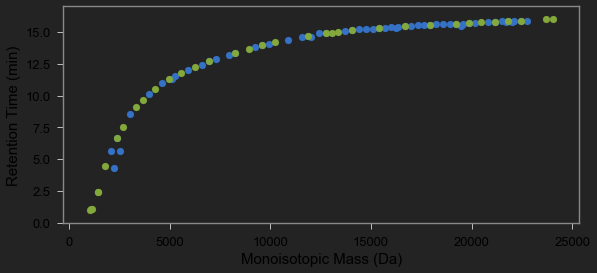

In [128]:
plt, fig = local_plot_zones(df_skeleton, df_gap_dots)

df_a = df_skeleton.copy()
df_b = df_gap_dots.copy()
df_a['isSkeleton'] = True
df_b['isSkeleton'] = False
df_merge = pd.concat([df_a, df_b])
output(df_merge, plt, fig, 3, 'gap_fill')

In [121]:
df_merge = pd.concat([df_skeleton, df_gap_dots]).drop_duplicates()

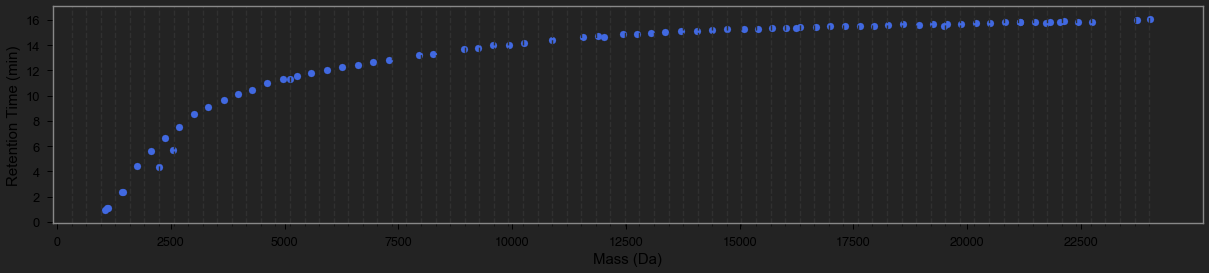

In [122]:
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(17, 4))
ax = plt.subplot()
plt.xlabel('Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
# plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
# plt.xticks(range(0, int(df_merge.Mass.max()), 320), fontname="Arial", size=13, color='black')
mass_max = int(df_merge.Mass.max()) + 1
major_loc = ticker.FixedLocator(range(0, mass_max, 2500))
minor_loc = ticker.FixedLocator(range(0, mass_max, 320))
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_minor_locator(minor_loc)
ax.tick_params(which='major', colors='black')
ax.tick_params(which='minor', colors='black')
plt.yticks(range(0, 17, 2), fontname="Arial", size=13, color='black')
# plt.grid(True, which='minor', axis='y')
# plt.scatter(df_3p_24252.Mass, df_3p_24252.RT, color='red', marker='s')
plt.scatter(df_merge.Mass, df_merge.RT, color='royalblue')
# plt.xlim(320, 25000)
plt.grid(True, axis='x', linestyle='--', which='minor')
# plt.grid(b=True,which='both')
# plt.scatter(df_skeleton.Mass, df_skeleton.RT, color='royalblue')
# plt.scatter(df_phe_big.iloc[1].Mass, df_phe_big.iloc[1].RT, color='royalblue')
# fig.tight_layout()
# plt.savefig('/Users/bryan/Downloads/tRNA_phe_ladders_sep28.svg', transparent=True, dpi=300)
output(df_merge, plt, fig, 4, 'seats')